../000300.SH/000300.SH.csv ===============
Day count: 727
Factors Shape: (727, 10) (727, 38)
standardized shape:  (48, 727)


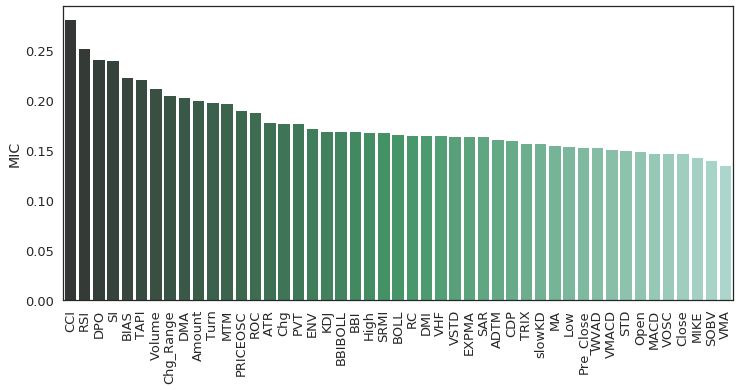

In [66]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
from minepy import MINE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", context="talk")

from sklearn import preprocessing

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 30)
pd.set_option('precision', 7)
pd.options.display.float_format = '{:,.3f}'.format
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)


'''
读入一支股票指定年份的ohlcv数据
输入:baseDir,stockCode为字符, startYear,yearNum为整数，
输出:dataframe
'''
def readWSDFile(baseDir, stockCode, startYear, yearNum=1):
    # 解析日期
    filename = baseDir+stockCode+'/'+stockCode+'.csv'
    print (filename, "===============")
    dateparse = lambda x: pd.datetime.strptime(x, '%Y/%m/%d').date()
    df = pd.read_csv(filename, index_col=0, sep=',', header=None,
                            skiprows=1, names=['Date','Pre_Close','Open','High','Low','Close','Chg','Chg_Range',
                                               'Volume','Amount','Turn'],
                           parse_dates=True, date_parser=dateparse)
    return df['2013-01-04':'2015-12-31']


#usecols = [0, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
           #21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 33, 34, 36, 37]
# usecols = [0, 6, 16, 17, 24, 31]
#usecols = [0, 2,11,24,26,29,30]
# usecols = [0, 5,7,11,19,24,26,28] #使用所有41维
def readWSDIndexFile(baseDir, stockCode, startYear, yearNum=1):
    # 解析日期
    dateparse = lambda x: pd.datetime.strptime(x, '%Y/%m/%d').date()
    df = 0
    for i in range(yearNum):
        tempDF = pd.read_csv(baseDir+'I'+stockCode+'/wsd_'+stockCode+'_'+str(startYear+i)+'.csv', 
                             index_col=0, sep=',', parse_dates=True, date_parser=dateparse
                             # , usecols=usecols
                             )
        if i==0: df = tempDF
        else: df = df.append(tempDF)
    return df


baseDir = '../'
stockCodes = ['000300.SH']#, '000016.SH', '000905.SH']

i = 0
startYear = 2013
number = 3
df = readWSDFile(baseDir, stockCodes[i], startYear, number)
# R = df['Close'].pct_change()
# R[0] = R[1]
# upOrDowns = []
# for v in R.values:
#     if v>0: upOrDowns.append(1)
#     else: upOrDowns.append(-1)
# print upOrDowns
print ('Day count:', len(df))
# print df.head(5)
# df['R'] = R

dfi = readWSDIndexFile(baseDir, stockCodes[i], startYear, number)
# dfi['R'] = R
print ("Factors Shape:", np.shape(df), np.shape(dfi))

allDF = pd.concat([df, dfi], axis=1)

scaler = preprocessing.MinMaxScaler()
X_Standard = scaler.fit_transform(df)
X_Standard_T = np.transpose(X_Standard)
Xi_Standard = scaler.fit_transform(dfi)
Xi_Standard_T = np.transpose(Xi_Standard)
X_ALL_Standard = scaler.fit_transform(allDF)
X_ALL_Standard_T = np.transpose(X_ALL_Standard)
print ("standardized shape: ", np.shape(X_ALL_Standard_T))

mine = MINE(alpha=0.6, c=15, est="mic_approx")
mics = []
# mine.compute_score(df['Close'].values, df['R'].values); print mine.mic()
# # for i in range(0,10):
# #     mine.compute_score(X_Standard_T[i], X_Standard_T[10])
# #     mics.append(mine.mic())
# #     print i, mine.mic()
# for i in [7,9]:
#     mine.compute_score(X_Standard_T[i], X_Standard_T[10])
#     mics.append(mine.mic())
#     print i, mine.mic()
# # for i in range(0,38):
# #     mine.compute_score(Xi_Standard_T[i], Xi_Standard_T[38])
# #     mics.append(mine.mic())
# #     print i, mine.mic()
# for i in range(0,7):
#     mine.compute_score(Xi_Standard_T[i], Xi_Standard_T[7])
#     mics.append(mine.mic())
#     print i, mine.mic()
#

dim = 47
for i in range(dim):
    mine.compute_score(X_ALL_Standard_T[i], X_ALL_Standard_T[dim])
    mics.append(mine.mic())

names = []
for c in allDF.columns.values: names.append(c)

map = {}
for i in range(dim):
    map[names[i]] = mics[i]

import operator
sorted_tuple = sorted(map.items(), key=operator.itemgetter(1))

vs = []
ks = []
for k,v in sorted_tuple:
    ks.append(k); vs.append(v)
ks = ks[::-1] # reverse the original ordered sequence
vs = vs[::-1]

def plotMICHist():
    f, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(ks, vs, palette="BuGn_d", ax=ax)
    ax.set_ylabel("MIC")
    plt.xticks(rotation=90)
    f.subplots_adjust(bottom=0.2)
    plt.show()
plotMICHist()

In [53]:
df

,Pre_Close,Open,High,Low,Close,Chg,Chg_Range,Volume,Amount,Turn
Date,,,,,,,,,,
2005-01-04,"1,000.000",994.770,994.770,980.660,982.790,-17.210,-1.721,"7,412,868.940","4,431,977,418.000",0.000
2005-01-05,982.790,981.580,997.320,979.880,992.560,9.770,0.994,"7,119,108.980","4,529,208,214.000",0.000
2005-01-06,992.560,993.330,993.790,980.330,983.170,-9.390,-0.946,"6,288,029.050","3,921,015,420.000",0.000
2005-01-07,983.170,983.040,995.710,979.810,983.960,0.780,0.080,"7,298,694.090","4,737,469,399.000",0.000
2005-01-10,983.960,983.760,993.960,979.790,993.880,9.920,1.008,"5,791,697.990","3,762,932,890.000",0.000
2005-01-11,993.880,994.190,999.550,991.090,997.140,3.260,0.328,"5,849,079.980","3,704,076,709.000",0.000
2005-01-12,997.140,996.650,996.980,989.260,996.750,-0.390,-0.039,"5,014,525.090","3,093,299,668.000",0.000
2005-01-13,996.750,996.080,999.470,992.700,996.880,0.130,0.013,"6,044,065.840","3,842,173,302.000",0.000
2005-01-14,996.880,996.620,"1,006.460",987.230,988.310,-8.570,-0.860,"7,297,842.380","4,162,921,211.000",0.000


In [54]:
dfi

,ADTM,ATR,BBI,BBIBOLL,BIAS,BOLL,CCI,CDP,DMA,DMI,DPO,ENV,EXPMA,KDJ,slowKD,...,RSI,SAR,SI,SOBV,SRMI,STD,TAPI,TRIX,VHF,VMA,VMACD,VOSC,VSTD,WVAD,vol_ratio
DateTime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-04,0.000,19.342,"1,009.353","1,009.353",-2.709,"1,031.623",0.000,0.000,-38.750,0.000,-26.196,"1,074.616","1,010.478",0.000,0.000,...,16.051,"1,014.751",0.000,"-741,286,894.000",-0.025,22.813,"3,566,197.408",-0.233,0.493,"1,482,573.788","591,339.972",53.846,0.000,"-6,290,773.549",0.000
2005-01-05,0.000,17.446,"1,006.255","1,006.255",-1.494,"1,028.977",66.667,985.254,-38.972,14.639,-14.897,"1,071.184","1,007.722",0.000,0.000,...,33.023,"1,012.024",38.886,"-29,375,996.000",-0.040,23.197,"3,617,760.490",-0.241,0.465,"2,906,395.584","1,024,467.761",53.846,0.000,"-1,807,358.992",0.960
2005-01-06,0.855,13.458,"1,002.401","1,002.401",-2.214,"1,025.914",-55.803,990.582,-42.327,8.264,-22.020,"1,067.391","1,003.946",0.000,0.000,...,26.779,"1,008.809",-40.911,"-658,178,901.000",-0.032,23.778,"3,163,563.428",-0.250,0.388,"4,164,001.394","1,285,841.073",53.846,0.000,"-6,553,050.110",0.865
2005-01-07,0.580,15.899,"1,000.321","1,000.321",-1.940,"1,023.060",-26.567,985.116,-43.788,9.566,-16.683,"1,064.435","1,000.871",0.000,0.000,...,28.140,"1,005.916",-99.808,"71,690,508.000",-0.032,24.186,"3,805,972.784",-0.258,0.414,"5,623,740.212","1,556,590.126",53.846,0.000,"-6,133,922.636",1.052
2005-01-10,0.775,14.170,998.482,998.482,-0.620,"1,020.669",69.014,985.860,-44.912,7.343,-4.796,"1,063.262",999.795,0.000,0.000,...,43.962,"1,002.783",176.916,"650,860,307.000",-0.018,23.877,"3,004,575.124",-0.260,0.384,"6,782,079.810","1,630,760.321",53.846,0.000,"-1,997,988.130",0.824
2005-01-11,0.848,8.462,998.611,998.611,-0.141,"1,018.315",168.095,990.376,-45.617,14.506,0.211,"1,062.431",999.386,0.000,0.000,...,48.433,999.564,60.472,"1,235,768,305.000",-0.013,23.050,"2,945,676.855",-0.256,0.387,"6,469,322.018","1,674,864.190",53.846,0.000,"38,337.753",0.862
2005-01-12,0.858,7.878,999.303,999.303,-0.016,"1,015.872",97.341,996.229,-46.232,13.028,1.251,"1,059.608",998.980,0.000,0.000,...,47.888,996.976,37.804,"1,737,220,814.000",-0.009,21.808,"2,461,009.678",-0.248,0.390,"6,048,405.240","1,623,757.553",53.846,0.000,"101,352.254",0.775
2005-01-13,0.761,6.778,998.755,998.755,0.127,"1,013.899",103.289,994.932,-45.941,14.947,2.637,"1,058.197",998.656,0.000,0.000,...,48.121,979.789,3.961,"2,341,627,398.000",-0.007,21.105,"3,058,290.604",-0.238,0.394,"5,999,612.598","1,647,340.987",53.846,0.000,"813,835.082",0.999
2005-01-14,0.814,19.230,997.192,997.192,-0.547,"1,011.558",54.727,996.481,-46.621,18.930,-4.369,"1,056.070",997.064,31.930,3.548,...,35.455,980.184,-131.765,"1,611,843,160.000",-0.012,20.427,"3,342,047.503",-0.229,0.378,"5,999,442.256","1,747,061.283",53.846,0.000,"-2,340,214.217",1.216
